# Hand Gesture Recognition
## Part of Final Project to control Turtlbot Lite 3 via Hand Gesture
## Team 1: Archit Jain, Vishal Nadig

In [1]:
#Importing libraries
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras

import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from keras import optimizers

In [2]:
print("Num GPU's Available: ", len(tf.config.list_physical_devices('GPU')))
# print(tf.test.is_gpu_available())

Num GPU's Available:  1


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1915979983407043437
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1723124942
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12478232193267189225
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [4]:
#Creating list of files in each subdirectory of the Dataset
zero_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\0")
one_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\1")
two_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\2")
three_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\3")
four_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\4")
five_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\5")
six_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\6")
seven_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\7")
eight_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\8")
nine_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\9")
# unknown_data_list = os.listdir(fr"C:\Users\archi\Downloads\grayscale_gesture\unknown")

In [5]:
#Creating lists of filenames, categories and their path that will be later merged into a dataframe
# filenames = zero_data_list + one_data_list + two_data_list + three_data_list + four_data_list + five_data_list + six_data_list + seven_data_list + eight_data_list + nine_data_list + unknown_data_list
categories = []
filepath = []

for x in zero_data_list:
  categories.append('0')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\0\{x}" 
  filepath.append(path)

for x in one_data_list:
  categories.append('1')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\1\{x}" 
  filepath.append(path)

for x in two_data_list:
  categories.append('2')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\2\{x}"
  filepath.append(path)

for x in three_data_list:
  categories.append('3')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\3\{x}"
  filepath.append(path)

for x in four_data_list:
  categories.append('4')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\4\{x}"
  filepath.append(path)

for x in five_data_list:
  categories.append('5')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\5\{x}"
  filepath.append(path)

for x in six_data_list:
  categories.append('6')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\6\{x}"
  filepath.append(path)

for x in seven_data_list:
  categories.append('7')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\7\{x}" 
  filepath.append(path)

for x in eight_data_list:
  categories.append('8')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\8\{x}" 
  filepath.append(path)

for x in nine_data_list:
  categories.append('9')
  path = fr"C:\Users\archi\Downloads\grayscale_gesture\9\{x}" 
  filepath.append(path)

# for x in unknown_data_list:
#   categories.append('unknown')
#   path = fr"C:\Users\archi\Downloads\grayscale_gesture\unknown\{x}" 
#   filepath.append(path)

In [6]:
# Creating the Dataframe
df = pd.DataFrame({
        # 'filename': filenames,
        'category': categories,
        'filepath': filepath
     })

In [7]:
df.head()

,category,filepath
0,0,C:\Users\archi\Downloads\grayscale_gesture\0\z...
1,0,C:\Users\archi\Downloads\grayscale_gesture\0\z...
2,0,C:\Users\archi\Downloads\grayscale_gesture\0\z...
3,0,C:\Users\archi\Downloads\grayscale_gesture\0\z...
4,0,C:\Users\archi\Downloads\grayscale_gesture\0\z...


In [8]:
#Setting target tize of images to be input into the model
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
batch_size_gen = 32

<Axes: xlabel='category'>

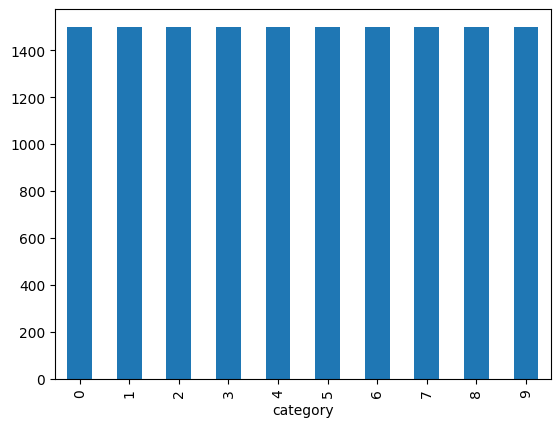

In [9]:
#Exploring total amount of data for each category
df['category'].value_counts().plot.bar()

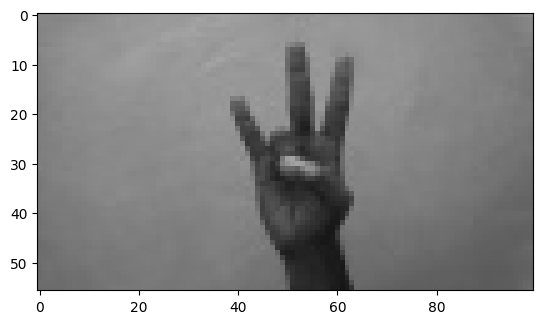

In [10]:
#Previwing a random image
sample = random.choice(filepath)
image = load_img(sample)
plt.imshow(image)

## Splitting Data into Train and test with 80% in train

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
total_train = train.shape[0]
total_val = test.shape[0]

In [12]:
#Creating Image Data Generator for Training Data so that data set is larger
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)

In [13]:
train_gen = datagen.flow_from_dataframe(train,
                                        directory = None,
                                        x_col = 'filepath',
                                        y_col = 'category',
                                        target_size = IMAGE_SIZE,
                                        batch_size = batch_size_gen)

Found 12000 validated image filenames belonging to 10 classes.


In [14]:
#Creating Image Data Generator for Testing + Rescale Image value by 255.
datagen_test = ImageDataGenerator(rescale=1./255)

In [15]:
test_gen = datagen_test.flow_from_dataframe(test,
                                            directory = None,
                                            x_col = 'filepath',
                                            y_col = 'category',
                                            target_size = IMAGE_SIZE,
                                            batch_size = batch_size_gen)

Found 3000 validated image filenames belonging to 10 classes.


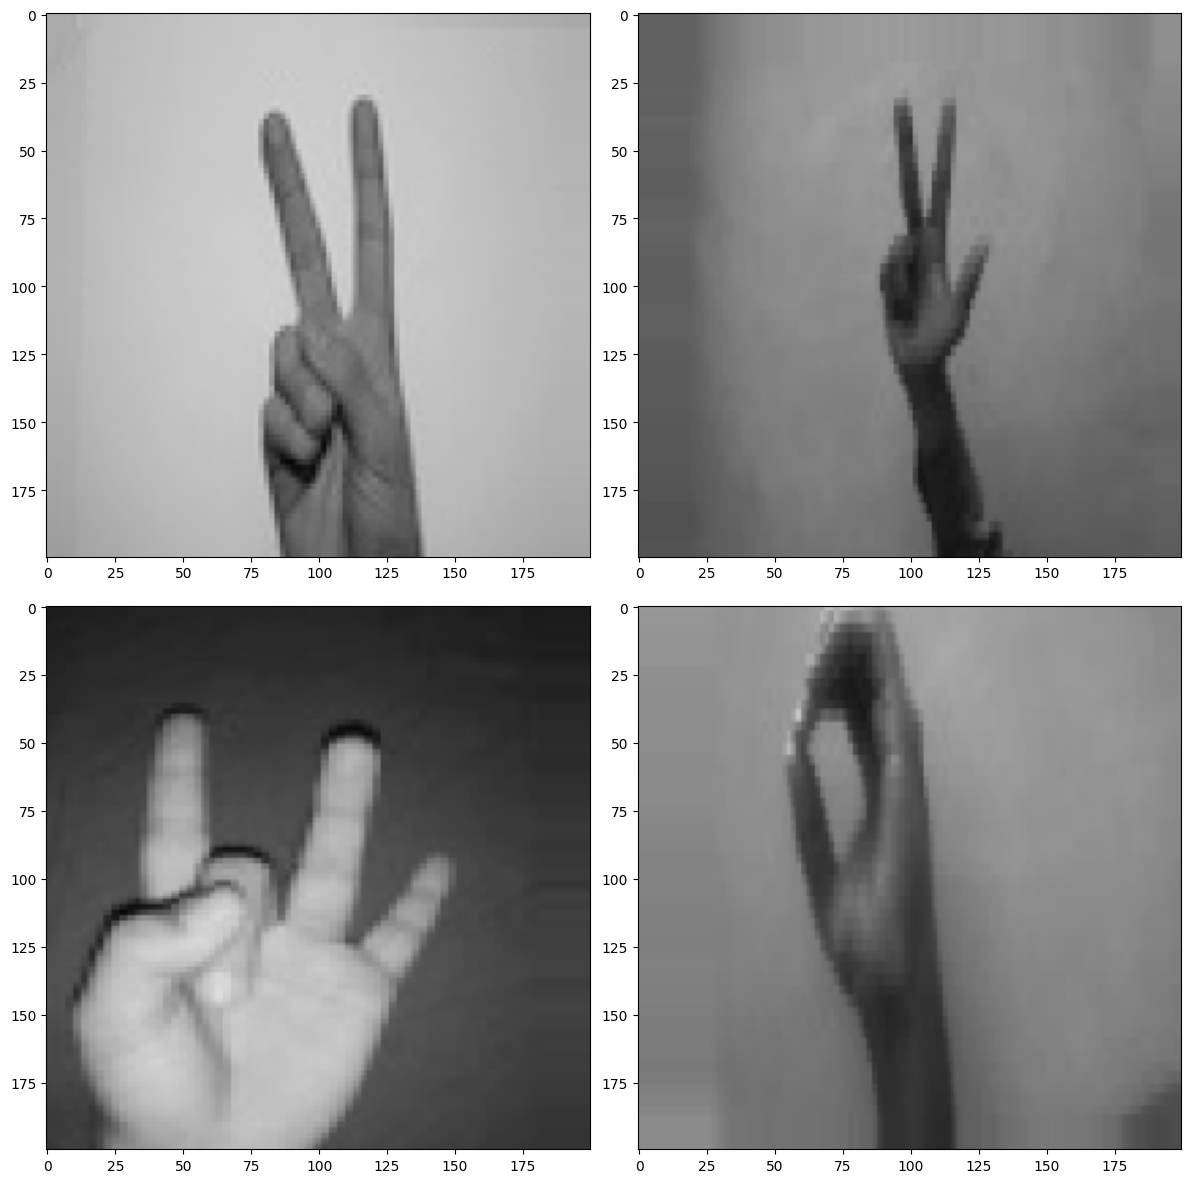

In [16]:
# View 4 Images generated from Image Generator
plt.figure(figsize=(12, 12))
for i in range(4):
  plt.subplot(2,2, i+1)
  for X_batch, Y_batch in train_gen:
    image=X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

## Model 1 - Training Convulational Neural Network from Scratch

In [17]:
#Creating Model
import tensorflow as tf
from keras import models, layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(512, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile( loss='categorical_crossentropy', 
              optimizer = optimizers.Adam(learning_rate=0.0005, 
                                          beta_1=0.85, beta_2=0.95, 
                                          epsilon=1e-05), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [18]:
# Create Checkpointer to periodically save the model once validation_accuracy increases
path_to_model = fr"C:\Users\archi\OneDrive - Arizona State University\Desktop\ASU Classes\EGR 598 Exp and Depl of Robotics\Project\Model"
path_to_logs = fr"C:\Users\archi\OneDrive - Arizona State University\Desktop\ASU Classes\EGR 598 Exp and Depl of Robotics\Project\Logs"
checkpointer_new = keras.callbacks.ModelCheckpoint(filepath=f"{path_to_model}/GrayScale_Trial3.h5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

In [19]:
#Training the model
history = model.fit(train_gen, 
          epochs=15, 
          validation_data = test_gen, 
          steps_per_epoch = total_train/batch_size_gen, 
          validation_steps = total_val/batch_size_gen,
          callbacks=[checkpointer_new]
          )

Epoch 1/15
375/375 [==============================] - ETA: 0s - loss: 1.9702 - accuracy: 0.2968
Epoch 1: val_accuracy improved from -inf to 0.64233, saving model to C:\Users\archi\OneDrive - Arizona State University\Desktop\ASU Classes\EGR 598 Exp and Depl of Robotics\Project\Model\GrayScale_Trial3.h5
375/375 [==============================] - 66s 164ms/step - loss: 1.9702 - accuracy: 0.2968 - val_loss: 1.0902 - val_accuracy: 0.6423
Epoch 2/15
375/375 [==============================] - ETA: 0s - loss: 1.0598 - accuracy: 0.6442
Epoch 2: val_accuracy improved from 0.64233 to 0.79700, saving model to C:\Users\archi\OneDrive - Arizona State University\Desktop\ASU Classes\EGR 598 Exp and Depl of Robotics\Project\Model\GrayScale_Trial3.h5
375/375 [==============================] - 64s 170ms/step - loss: 1.0598 - accuracy: 0.6442 - val_loss: 0.6030 - val_accuracy: 0.7970
Epoch 3/15
375/375 [==============================] - ETA: 0s - loss: 0.6764 - accuracy: 0.7773
Epoch 3: val_accuracy impro

In [ ]:
# Plotting the training validation accuracy and losses
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Manual Test of the model

In [ ]:
#Loading the model saved previously
modelpath = f"{path_to_model}/GrayScale_Trial3.h5"
model = keras.models.load_model(modelpath)
model.summary()

In [ ]:
# To get the keys we print it and copy and then save it in a list
print(test_gen.class_indices.keys())

#Load pics saved in google drive for testing purposes and converting them to tensors

manual_val_pics = os.listdir(fr"C:\Users\archi\Downloads\HandTestPic") #Contains Pics from pur tests
pics=[]
ans = []
for pic in manual_val_pics:
  path = fr"C:\Users\archi\Downloads\HandTestPic\\" + pic
  # print(path)
  pics.append(tf.keras.preprocessing.image.load_img(
    path, color_mode="rgb", target_size=(200, 200), interpolation="nearest"))
  ans.append(pic)


In [ ]:
# Rescale images
pic_arrays=[]
for pic in pics:
  pic_arrays.append((tf.keras.preprocessing.image.img_to_array(pic, data_format=None, dtype=None)/255))

In [ ]:
#Generate predictions by the model
predictions=[]
for pic in pic_arrays:
  img = np.expand_dims(pic, axis=0)
  predictions.append(model.predict(img))

In [ ]:
predictions

In [ ]:
key2 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# As per the predictions obtaing what category they should belong to and converting it to text
#compare results to to the file name
for i in range(11):
  print(key2[np.argmax(predictions[i][0])] + ' should be ' + ans[i].split('.')[0])


# Activation Maps

In [ ]:
# selecting a random image from the dataset
img_path = random.choice(filepath)

# We preprocess the image into a 4D tensor
# from keras.preprocessing import image
import numpy as np

import tensorflow.keras.utils as utils

img = utils.load_img(img_path, target_size=(200, 200))
img_tensor = utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 200, 200, 3)
print(img_tensor.shape)

In [ ]:
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()